# Fraud Detection in Electricity and Gas Consumption

## Description

&emsp;
Le vol d'électricité et de gaz peut entraîner des pertes financières importantes pour les compagnies d'énergie et des factures injustes pour les clients honnêtes. Il est donc crucial de développer des méthodes efficaces pour détecter et prévenir ces activités frauduleuses. Pour résoudre ce problème, nous allons développer un modèle de machine learning capable d'identifier les cas de fraude dans la consommation d'électricité et de gaz en utilisant les données historiques fournies par la STEG, la Société Tunisienne de l'Electricité et du Gaz. Ces données couvrent la période de 2005 à 2019 et comprennent des informations sur les clients et leur historique de facturation.

## Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.simplefilter('ignore')

In [2]:
DATA_DIR = 'data/'

TRAIN_DIR = f'{DATA_DIR}/train'
TEST_DIR = f'{DATA_DIR}/test'

OUTPUT_DIR = f'{DATA_DIR}/output'

In [ ]:
!unzip "data/train.zip" -d "data/train/"
!unzip "data/test.zip" -d "data/test/"

In [3]:
client_train = pd.read_csv(f'{TRAIN_DIR}/client_train.csv', low_memory=False)
invoice_train = pd.read_csv(f'{TRAIN_DIR}/invoice_train.csv', low_memory=False)

client_test = pd.read_csv(f'{TEST_DIR}/client_test.csv', low_memory=False)
invoice_test = pd.read_csv(f'{TEST_DIR}/invoice_test.csv', low_memory=False)
sample_submission = pd.read_csv(f'{DATA_DIR}/SampleSubmission.csv', low_memory=False)

## Exploratory Data Analysis

In [9]:
print(
    "\tclient_train: ", client_train.shape, "\n",
    "\tinvoice_train: ", invoice_train.shape, "\n",
    "\tclient_test: ", client_test.shape, "\n",
    "\tinvoice_train: ", invoice_train.shape
)

	client_train:  (135493, 6) 
 	invoice_train:  (4476749, 16) 
 	client_test:  (58069, 5) 
 	invoice_train:  (4476749, 16)


Ci-dessus, on peut observer le nombre d'observations et de variables dans chaque tableau.

Nous allons utiliser les tableaux client_train et invoice_train pour notre analyse.

Nous allons voir un aperçu des premières lignes dans nos données.

In [10]:
invoice_train.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [11]:
client_train.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


Nous allonns maintenant avoir un aperçu des caractéristiques des colonnes.

In [15]:
invoice_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


In [16]:
client_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


Les clients frauduleux ont la valeur 1 dans la variable *target* et 0 dans le cas contraire.

Regardons le nombre de valeurs manquantes dans nos données.

In [12]:
invoice_train.isna().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

In [13]:
client_train.isna().sum()

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64

On observe aucune valeur manquante dans nos données.

Maintenant nous allons observée les statistiques des variables dans nos données.

In [25]:
invoice_train.describe()

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01
std,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


In [26]:
client_train.describe()

,disrict,client_catg,region,target
count,135493.000000,135493.000000,135493.000000,135493.000000
mean,63.511222,11.512506,206.159809,0.055841
std,3.354400,4.423761,104.207044,0.229614
min,60.000000,11.000000,101.000000,0.000000
25%,62.000000,11.000000,103.000000,0.000000
50%,62.000000,11.000000,107.000000,0.000000
75%,69.000000,11.000000,307.000000,0.000000
max,69.000000,51.000000,399.000000,1.000000


Observons maintenant le nombre de valeurs uniques de chacune des variables.

In [17]:
invoice_train.nunique()

client_id               135493
invoice_date              8275
tarif_type                  17
counter_number          201893
counter_statue              12
counter_code                42
reading_remarque             8
counter_coefficient         16
consommation_level_1      8295
consommation_level_2     12576
consommation_level_3      2253
consommation_level_4     12075
old_index               155648
new_index               157980
months_number             1370
counter_type                 2
dtype: int64

In [18]:
client_train.nunique()

disrict               4
client_id        135493
client_catg           3
region               25
creation_date      8088
target                2
dtype: int64

Maintenant, nous allons voir la répartition entre les clients détectés comme frauduleux et ceux non frauduleux.

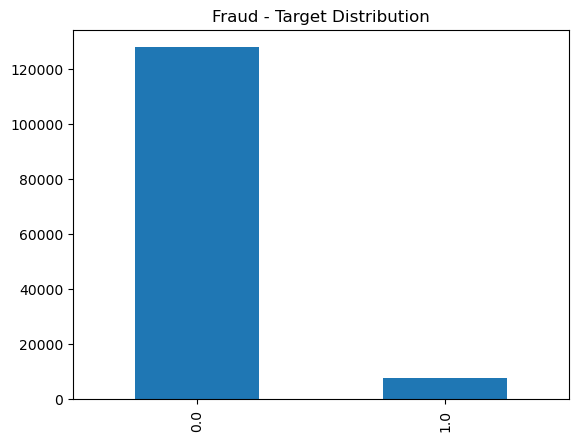

In [28]:
client_train["target"].value_counts().plot.bar()
plt.title('Fraud - Target Distribution')
plt.show()

La répartition est déséquilibrée en faveur des clients non frauduleux.

## Feature Engineering and Modelling

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Pour selectionner les variables à utiliser pour le modèle, nous allons nous aider des descriptions suivantes.

#### Variable definitions

- Client_id: Unique id for client
- District: District where the client is
- Client_catg: Category client belongs to
- Region: Area where the client is
- Creation_date: Date client joined
- Target: fraud:1 , not fraud: 0
- Invoice data

- Client_id: Unique id for the client
- Invoice_date: Date of the invoice
- Tarif_type: Type of tax
- Counter_number:
- Counter_statue: takes up to 5 values such as working fine, not working, on hold statue, ect
- Counter_code:
- Reading_remarque: notes that the STEG agent takes during his visit to the client (e.g: If the counter shows something wrong, the agent gives a bad score)
- Counter_coefficient: An additional coefficient to be added when standard consumption is exceeded
- Consommation_level_1: Consumption_level_1
- Consommation_level_2: Consumption_level_2
- Consommation_level_3: Consumption_level_3
- Consommation_level_4: Consumption_level_4
- Old_index: Old index
- New_index: New index
- Months_number: Month number
- Counter_type: Type of counter

In [90]:
def most(series):
    return series.value_counts().iloc[0]

def aggregate_by_client_id(invoice_data):
    aggs = {
        'consommation_level_1': 'mean',
        'consommation_level_2': 'mean',
        'consommation_level_3': 'mean',
        'consommation_level_4': 'mean',
        'reading_remarque': most,
        'counter_statue': most,
        'counter_coefficient': most,
        'counter_type': most,
    }
    
    agg_trans = invoice_data.groupby(['client_id']).agg(aggs)
    agg_trans.reset_index(inplace=True)

    return agg_trans

In [126]:
def preprocess_df(client_data, invoice_data):

    df = client_data[[ "client_catg", "disrict", 'region','client_id']]
    df_agg = aggregate_by_client_id(invoice_data)
    
    for col in ["counter_statue", "counter_type", "reading_remarque", 'counter_coefficient']:
        df_agg[col] = df_agg[col].astype(int)
        
    return pd.merge(df,df_agg, on='client_id', how='left')

In [127]:
train = preprocess_df(client_train, invoice_train)
test = preprocess_df(client_test, invoice_test)

In [128]:
X = train.drop(columns="client_id")
Y = client_train['target']

In [129]:
oversampler = RandomOverSampler()

Xs, Ys = oversampler.fit_resample(X, Y)

In [130]:
x_train, x_val, y_train, y_val = train_test_split(Xs, Ys, random_state=42, test_size=0.3)

In [131]:
model = make_pipeline(
    LogisticRegression()
)
model.fit(x_train, y_train)

Pipeline(steps=[('logisticregression', LogisticRegression())])

In [132]:
accuracy_score(y_val, model.predict(x_val))

0.6328543325038759

In [143]:
model = make_pipeline(
    SVC()
)
model.fit(x_train, y_train)

Pipeline(steps=[('svc', SVC())])

In [144]:
accuracy_score(y_val, model.predict(x_val))

0.6651771173964589

## Make Predictions on test set

In [145]:
sub_client_id = test["client_id"]
preds = model.predict(test.drop("client_id", axis=1))
preds = pd.DataFrame(preds, columns=['target'])
preds.head()

,target
0,0.0
1,1.0
2,1.0
3,0.0
4,1.0


In [146]:
submission = pd.DataFrame(
    {
        'client_id': sub_client_id,
        'target': preds['target']
    }
)

submission.head()

,client_id,target
0,test_Client_0,0.0
1,test_Client_1,1.0
2,test_Client_10,1.0
3,test_Client_100,0.0
4,test_Client_1000,1.0


In [147]:
submission.to_csv('submission.csv', index=False)